<a href="https://colab.research.google.com/github/singhvikasguru/BT/blob/master/FChq_nchq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow==1.12.0
import tensorflow as tf
print(tf.__version__)

In [0]:
!pip install q keras==2.2.2 

    100% |████████████████████████████████| 307kB 7.7MB/s 
    100% |████████████████████████████████| 51kB 19.9MB/s 
tensorflow 1.13.1 has requirement keras-applications>=1.0.6, but you'll have keras-applications 1.0.4 which is incompatible.
tensorflow 1.13.1 has requirement keras-preprocessing>=1.0.5, but you'll have keras-preprocessing 1.0.2 which is incompatible.
  Found existing installation: Keras-Preprocessing 1.0.9
    Uninstalling Keras-Preprocessing-1.0.9:
      Successfully uninstalled Keras-Preprocessing-1.0.9
  Found existing installation: Keras-Applications 1.0.7
    Uninstalling Keras-Applications-1.0.7:
      Successfully uninstalled Keras-Applications-1.0.7
  Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


In [0]:
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131304 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.3-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.3-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.3-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [0]:
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir gdrive
!google-drive-ocamlfuse gdrive
!ls gdrive
!cd gdrive

mkdir: cannot create directory ‘gdrive’: File exists
fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option
10April19.zip	   Data		new_model2.h5	  new_non_chq.zip
9April19.zip	   dummy225.h5	new_model3.h5	  non-cheque.zip
AI_0_9_Images.zip  dummy25.h5	new_model.h5	  non_chq_f.zip
cheque.zip	   dummy.h5	new_non_chq2.zip


In [0]:
!ls gdrive
!cd gdrive
!ls gdrive

 9April19.zip	     dummy225.h5   new_model2.h5   new_non_chq2.zip
 AI_0_9_Images.zip   dummy25.h5    new_model3.h5  'new_non_chq (f7d572d5).zip'
 Data		     dummy.h5	   new_model.h5    non_chq_f.zip
 chq_nchq_model_keras_4000_3isto1_threshold_point01.h5	 dummy.h5
 chq_nchq_model_keras_4000_threshold_point01.h5		'Non Cheque Image.zip'
 chq_nchq_model_weights_4000_1.h5			 PngDocument_26dec.zip
 chq_nchq_model_weights_4000_3isto1.h5


In [0]:
import zipfile
a=!unzip gdrive/cheque.zip
a2=!unzip gdrive/non-cheque.zip

In [0]:
#a2=!unzip gdrive/non_chq_f.zip

In [0]:
a

['Archive:  gdrive/10April19.zip',
 '   creating: cheque/',
 '  inflating: cheque/20190404224207_11038540_19.png  ',
 '  inflating: cheque/20190404224229_11058158_10.png  ',
 '  inflating: cheque/20190405210425_A5583970_12.png  ',
 '  inflating: cheque/20190405210436_B2524617_11.png  ',
 '  inflating: cheque/20190405210439_B2524631_14.png  ',
 '  inflating: cheque/20190405210441_B2524671_16.png  ',
 '  inflating: cheque/20190405210442_B2524674_13.png  ',
 '  inflating: cheque/20190405210444_B2524692_18.png  ',
 '  inflating: cheque/20190405210449_A5588017_11.png  ',
 '  inflating: cheque/20190405210452_C4122536_10.png  ',
 '  inflating: cheque/20190405210454_A5589122_12.png  ',
 '  inflating: cheque/20190405210504_A5589927_9.png  ',
 '  inflating: cheque/20190405210504_B2527103_15.png  ',
 '  inflating: cheque/20190405210506_70650383_11.png  ',
 '  inflating: cheque/20190405210506_B25271030_15.png  ',
 '  inflating: cheque/20190405210507_B25271031_10.png  ',
 '  inflating: cheque/20190

In [0]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import gc
import glob
import matplotlib.image as mping
import seaborn as sns
from sklearn.model_selection import train_test_split

#model import
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

Using TensorFlow backend.


In [0]:

chq_images=[]
for x in a[2:602]:
  sp=x.split(':')
  sp2=sp[1]
  sp2=sp2.strip()
  chq_images.append(cv2.imread(sp2))

In [0]:
nchq_images=[]
for x in a2[2:1800]:
  sp=x.split(':')
  sp2=sp[1]
  sp2=sp2.strip()
  nchq_images.append(cv2.imread(sp2))

In [0]:

fchq_images=chq_images[0:602]
#del chq_images
#gc.collect()

In [0]:
print(len(fchq_images))
print(len(nchq_images))

600
1798


In [0]:
n=500
train_images=nchq_images[:(3*n)]+fchq_images[:int(n)]
train_labels=[0 for x in range(0, 3*n)]
for i in range(0, int(n)):
    train_labels.append(1)
zip_train=list(zip(train_images, train_labels))
random.shuffle(zip_train)
train_images, train_labels=zip(*zip_train)

test_images=fchq_images[n:(n+100)]+nchq_images[n:(n+100)]

del fchq_images
del nchq_images
gc.collect()

251

In [0]:
len(train_images)

2000

In [0]:
nrows=150
ncols=150
channels=1 # 3 if colour image is needed
X=[]
X_test=[]
for img in train_images:
    X.append(cv2.resize(img, (nrows, ncols), interpolation=cv2.INTER_CUBIC))
for img in test_images:
    X_test.append(cv2.resize(img, (nrows, ncols), interpolation=cv2.INTER_CUBIC))
Y=train_labels
Y=np.asarray(Y)
X=np.asarray(X)
X_test=np.asarray(X_test)

#del train_images
#gc.collect()

In [0]:
del test_images
gc.collect()

257

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5, 1.0, 'Labels')

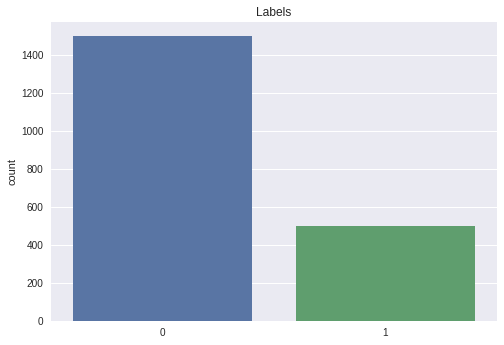

In [0]:
sns.countplot(Y)
plt.title("Labels")    

In [0]:
X_train, X_val, y_train, y_val=train_test_split(X, Y, test_size=0.2, random_state=2)

del X
del Y
gc.collect()

0

In [0]:
model=models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
train_datagen=ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen=ImageDataGenerator(rescale=1./255)

batch_size=32
train_genrator=train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_genrator=val_datagen.flow(X_val, y_val, batch_size=batch_size)
history=model.fit_generator(train_genrator, steps_per_epoch=X_train.shape[0]//batch_size, epochs=40 , validation_data=val_genrator, validation_steps=X_val.shape[0]//batch_size)


Instructions for updating:
Use tf.cast instead.
Epoch 1/20
50/50 [==============================] - 13s 269ms/step - loss: 0.5727 - acc: 0.7475 - val_loss: 0.5566 - val_acc: 0.7474
Epoch 2/20
50/50 [==============================] - 10s 195ms/step - loss: 0.5619 - acc: 0.7500 - val_loss: 0.5545 - val_acc: 0.7500
Epoch 3/20
50/50 [==============================] - 10s 190ms/step - loss: 0.5579 - acc: 0.7500 - val_loss: 0.5438 - val_acc: 0.7500
Epoch 4/20
50/50 [==============================] - 10s 193ms/step - loss: 0.5582 - acc: 0.7500 - val_loss: 0.5426 - val_acc: 0.7500
Epoch 5/20
50/50 [==============================] - 9s 189ms/step - loss: 0.5582 - acc: 0.7500 - val_loss: 0.5351 - val_acc: 0.7582
Epoch 6/20
50/50 [==============================] - 10s 200ms/step - loss: 0.5556 - acc: 0.7500 - val_loss: 0.6461 - val_acc: 0.7310
Epoch 7/20
50/50 [==============================] - 10s 194ms/step - loss: 0.5551 - acc: 0.7500 - val_loss: 0.5342 - val_acc: 0.7527
Epoch 8/20
50/50 [====

In [75]:
history=model.fit_generator(train_genrator, steps_per_epoch=X_train.shape[0]//batch_size, epochs=40 , validation_data=val_genrator, validation_steps=X_val.shape[0]//batch_size)


Epoch 1/40
50/50 [==============================] - 10s 195ms/step - loss: 0.3718 - acc: 0.8287 - val_loss: 0.2665 - val_acc: 0.8641
Epoch 2/40
50/50 [==============================] - 10s 196ms/step - loss: 0.3740 - acc: 0.8356 - val_loss: 0.5740 - val_acc: 0.8207
Epoch 3/40
50/50 [==============================] - 10s 193ms/step - loss: 0.3822 - acc: 0.8344 - val_loss: 0.7926 - val_acc: 0.8179
Epoch 4/40
50/50 [==============================] - 10s 191ms/step - loss: 0.3824 - acc: 0.8237 - val_loss: 0.3505 - val_acc: 0.8451
Epoch 5/40
50/50 [==============================] - 9s 189ms/step - loss: 0.3822 - acc: 0.8156 - val_loss: 0.4762 - val_acc: 0.8234
Epoch 6/40
50/50 [==============================] - 9s 189ms/step - loss: 0.3897 - acc: 0.8306 - val_loss: 0.4770 - val_acc: 0.8179
Epoch 7/40
50/50 [==============================] - 10s 193ms/step - loss: 0.3802 - acc: 0.8231 - val_loss: 0.6358 - val_acc: 0.8315
Epoch 8/40
50/50 [==============================] - 10s 191ms/step - lo

In [0]:
#model.save_weights('gdrive/dummy2.h5')
model.save('gdrive/fine_model_2.h5')

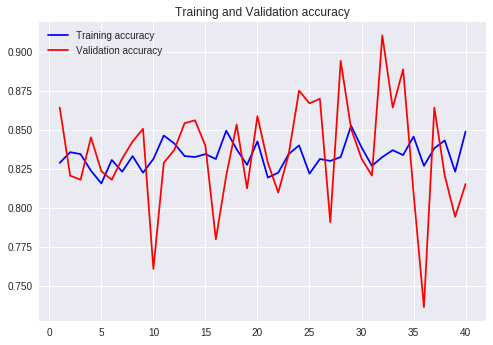

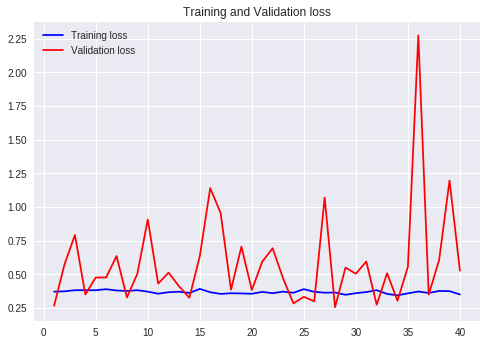

In [76]:
acc=history.history['acc']
val_acc=history.history['val_acc'] 
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1, len(acc)+1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [0]:
X_test.shape

(200, 150, 150, 3)

In [0]:
y_pred=model.predict(X_test)
label_pred=[]
for x in y_pred:
    if x>0.01:
        label_pred.append('Cheque')
    else:
        label_pred.append('Not-Cheque')

In [0]:
X_test2=X_test/255
y_pred2=model.predict(X_test2)
label_pred2=[]
for x in y_pred2:
    if x>0.05:
        label_pred2.append('Cheque')
    else:
        label_pred2.append('Not-Cheque')

In [82]:
label_pred2

['Cheque',
 'Cheque',
 'Cheque',
 'Not-Cheque',
 'Not-Cheque',
 'Not-Cheque',
 'Cheque',
 'Not-Cheque',
 'Not-Cheque',
 'Cheque',
 'Cheque',
 'Cheque',
 'Cheque',
 'Cheque',
 'Cheque',
 'Cheque',
 'Cheque',
 'Cheque',
 'Cheque',
 'Cheque',
 'Not-Cheque',
 'Cheque',
 'Not-Cheque',
 'Not-Cheque',
 'Cheque',
 'Cheque',
 'Cheque',
 'Cheque',
 'Cheque',
 'Not-Cheque',
 'Not-Cheque',
 'Cheque',
 'Cheque',
 'Not-Cheque',
 'Not-Cheque',
 'Cheque',
 'Cheque',
 'Cheque',
 'Not-Cheque',
 'Not-Cheque',
 'Cheque',
 'Cheque',
 'Cheque',
 'Cheque',
 'Not-Cheque',
 'Cheque',
 'Not-Cheque',
 'Not-Cheque',
 'Not-Cheque',
 'Not-Cheque',
 'Cheque',
 'Cheque',
 'Cheque',
 'Cheque',
 'Not-Cheque',
 'Cheque',
 'Not-Cheque',
 'Not-Cheque',
 'Not-Cheque',
 'Not-Cheque',
 'Cheque',
 'Cheque',
 'Cheque',
 'Not-Cheque',
 'Cheque',
 'Cheque',
 'Cheque',
 'Cheque',
 'Cheque',
 'Cheque',
 'Cheque',
 'Cheque',
 'Cheque',
 'Cheque',
 'Cheque',
 'Not-Cheque',
 'Not-Cheque',
 'Cheque',
 'Cheque',
 'Not-Cheque',
 'Cheque

In [0]:
test_datagen = ImageDataGenerator(rescale=1./255)
x=X_test
columns=2*100 
i = 0
text_labels = []
predl=[]
#plt.figure(figsize=(30,20))
for batch in test_datagen.flow(x, batch_size=1):
    pred = model.predict(batch)
    predl.append(pred)
    if pred > 0.01:
        text_labels.append('Cheque')
    else:
        text_labels.append('Non-Cheque')
    #plt.subplot(2*100 / columns + 1, columns, i + 1)
    #plt.title('This is a ' + text_labels[i])
    #imgplot = plt.imshow(batch[0])
    i+=1
    if i%200==0:
        break;

#plt.show()

In [0]:
ind=[x for x in range(0, 200)]
aa=list(zip(ind, label_pred, text_labels))
aa2=list(zip(ind, label_pred))
aa3=list(zip(ind, text_labels))
aa4=list(zip(ind, label_pred2))

In [0]:
print(aa)
print(aa2)
print(aa3)
print(aa4)

[(0, 'Not-Cheque', 'Cheque'), (1, 'Not-Cheque', 'Cheque'), (2, 'Not-Cheque', 'Cheque'), (3, 'Not-Cheque', 'Cheque'), (4, 'Not-Cheque', 'Cheque'), (5, 'Not-Cheque', 'Cheque'), (6, 'Not-Cheque', 'Cheque'), (7, 'Not-Cheque', 'Non-Cheque'), (8, 'Not-Cheque', 'Cheque'), (9, 'Not-Cheque', 'Cheque'), (10, 'Not-Cheque', 'Cheque'), (11, 'Not-Cheque', 'Cheque'), (12, 'Not-Cheque', 'Non-Cheque'), (13, 'Not-Cheque', 'Cheque'), (14, 'Not-Cheque', 'Non-Cheque'), (15, 'Not-Cheque', 'Cheque'), (16, 'Not-Cheque', 'Cheque'), (17, 'Not-Cheque', 'Non-Cheque'), (18, 'Not-Cheque', 'Non-Cheque'), (19, 'Not-Cheque', 'Cheque'), (20, 'Not-Cheque', 'Cheque'), (21, 'Not-Cheque', 'Cheque'), (22, 'Not-Cheque', 'Non-Cheque'), (23, 'Not-Cheque', 'Cheque'), (24, 'Not-Cheque', 'Cheque'), (25, 'Not-Cheque', 'Non-Cheque'), (26, 'Not-Cheque', 'Non-Cheque'), (27, 'Not-Cheque', 'Cheque'), (28, 'Not-Cheque', 'Cheque'), (29, 'Not-Cheque', 'Cheque'), (30, 'Not-Cheque', 'Cheque'), (31, 'Not-Cheque', 'Cheque'), (32, 'Not-Cheque'

In [0]:
print(np.asarray(text_labels))

['Cheque' 'Cheque' 'Cheque' 'Cheque' 'Cheque' 'Cheque' 'Cheque'
 'Non-Cheque' 'Cheque' 'Cheque' 'Cheque' 'Cheque' 'Non-Cheque' 'Cheque'
 'Non-Cheque' 'Cheque' 'Cheque' 'Non-Cheque' 'Non-Cheque' 'Cheque'
 'Cheque' 'Cheque' 'Non-Cheque' 'Cheque' 'Cheque' 'Non-Cheque'
 'Non-Cheque' 'Cheque' 'Cheque' 'Cheque' 'Cheque' 'Cheque' 'Non-Cheque'
 'Cheque' 'Cheque' 'Cheque' 'Cheque' 'Cheque' 'Non-Cheque' 'Cheque'
 'Cheque' 'Cheque' 'Cheque' 'Cheque' 'Cheque' 'Cheque' 'Cheque' 'Cheque'
 'Cheque' 'Cheque' 'Cheque' 'Cheque' 'Cheque' 'Cheque' 'Cheque' 'Cheque'
 'Cheque' 'Non-Cheque' 'Cheque' 'Non-Cheque' 'Cheque' 'Cheque' 'Cheque'
 'Cheque' 'Cheque' 'Non-Cheque' 'Cheque' 'Cheque' 'Non-Cheque' 'Cheque'
 'Cheque' 'Non-Cheque' 'Cheque' 'Non-Cheque' 'Cheque' 'Cheque' 'Cheque'
 'Cheque' 'Cheque' 'Cheque' 'Cheque' 'Cheque' 'Cheque' 'Non-Cheque'
 'Cheque' 'Non-Cheque' 'Cheque' 'Non-Cheque' 'Non-Cheque' 'Cheque'
 'Non-Cheque' 'Cheque' 'Cheque' 'Cheque' 'Cheque' 'Cheque' 'Cheque'
 'Cheque' 'Cheque' 'Cheque' '

In [0]:
test_labels=[1 for x in range(0,100)]
for x in range(0, 100):
  test_labels.append(0)
loss,acc = model.evaluate(X_test, test_labels)
print(loss, acc)

200/200 [==============================] - 0s 933us/step
8.059047734974616 0.5


In [0]:
del X_train
del X_val
del y_train
del y_val
gc.collect()

5366

In [0]:
gc.collect()

0

In [0]:
from keras.models import load_model
model=load_model('gdrive/new_model.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [0]:
import zipfile
!ls gdrive
at=!unzip gdrive/AI_0_9_Images.zip

9April19.zip	   Data		dummy25.h5  new_model2.h5  new_model.h5
AI_0_9_Images.zip  dummy225.h5	dummy.h5    new_model3.h5


In [0]:
len(at)

175

In [0]:
images=[]
for x in at[2:174]:
  sp=x.split(':')
  sp2=sp[1]
  sp2=sp2.strip()
  images.append(cv2.imread(sp2))

In [0]:
nrows=150
ncols=150

In [0]:
X_test=[]
for img in images:
    X_test.append(cv2.resize(img, (nrows, ncols), interpolation=cv2.INTER_CUBIC))

In [0]:
len(X_test)
X_test=np.asarray(X_test)


In [0]:
X_test=X_test/255

In [0]:
X_test

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [0]:
model.predict(X_test)

array([[0.878763  ],
       [0.52760434],
       [0.97197783],
       [0.9598665 ],
       [0.714728  ],
       [0.9568827 ],
       [0.7550254 ],
       [0.87886345],
       [0.9642061 ],
       [0.9981284 ],
       [0.8907759 ],
       [0.9165807 ],
       [0.9507381 ],
       [0.86417484],
       [0.89968956],
       [0.95654655],
       [0.8476279 ],
       [0.9266267 ],
       [0.9857404 ],
       [0.99686086],
       [0.8657086 ],
       [0.9815095 ],
       [0.92653847],
       [0.948496  ],
       [0.9517257 ],
       [0.8030431 ],
       [0.9259069 ],
       [0.9622972 ],
       [0.9862559 ],
       [0.96086717],
       [0.9392133 ],
       [0.9809659 ],
       [0.99353486],
       [0.99327415],
       [0.98008704],
       [0.9374205 ],
       [0.9033364 ],
       [0.9514141 ],
       [0.89844406],
       [0.89283586],
       [0.9424323 ],
       [0.9208684 ],
       [0.9728598 ],
       [0.91047   ],
       [0.9824809 ],
       [0.98944515],
       [0.7939847 ],
       [0.944

In [0]:
a[2:174]

['  inflating: PngDocument/1544160394336.png  ',
 '  inflating: PngDocument/1544185479388.png  ',
 '  inflating: PngDocument/1544185658763.png  ',
 '  inflating: PngDocument/1544186031897.png  ',
 '  inflating: PngDocument/1544229353655.png  ',
 '  inflating: PngDocument/1544229363809.png  ',
 '  inflating: PngDocument/1544229366477.png  ',
 '  inflating: PngDocument/1544229371279.png  ',
 '  inflating: PngDocument/1544229372433.png  ',
 '  inflating: PngDocument/1544229379829.png  ',
 '  inflating: PngDocument/1544229384177.png  ',
 '  inflating: PngDocument/1544229386769.png  ',
 '  inflating: PngDocument/1544229389433.png  ',
 '  inflating: PngDocument/1544229397818.png  ',
 '  inflating: PngDocument/1544229403679.png  ',
 '  inflating: PngDocument/1544229411531.png  ',
 '  inflating: PngDocument/1544229422830.png  ',
 '  inflating: PngDocument/1544229428363.png  ',
 '  inflating: PngDocument/1544229432673.png  ',
 '  inflating: PngDocument/1544229434709.png  ',
 '  inflating: PngDo

In [0]:
import keras; print(keras.__version__)

2.2.4


In [0]:
test_datagen = ImageDataGenerator(rescale=1./255)
x=X_test
columns=2*100 
i = 0
text_labels = []
predl=[]
#plt.figure(figsize=(30,20))
for batch in test_datagen.flow(x, batch_size=1):
    pred = model.predict(batch)
    predl.append(pred)
    if pred > 0.9:
        text_labels.append('Cheque')
    else:
        text_labels.append('Non-Cheque')
    #plt.subplot(2*100 / columns + 1, columns, i + 1)
    #plt.title('This is a ' + text_labels[i])
    #imgplot = plt.imshow(batch[0])
    i+=1
    if i%172==0:
        break;

In [0]:
text_labels

['Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheque',
 'Non-Cheq